In [1]:
# !jupyter nbconvert Data_Exploration_Projekt_Notebook_Timo.ipynb --to slides --post serve

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Overview

In [2]:
df = pd.read_csv("pump_train.csv")
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,12237,30.0,2013-01-23,Government Of Tanzania,107,District Council,39.360880,-10.295705,Zahanati Membe,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional
1,24566,0.0,2013-02-07,Private Individual,0,Edward,32.644074,-3.859265,Kwa Mama Wini,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional
2,20536,0.0,2011-07-15,Sawaka,0,DWE,30.999792,-1.721771,Kwasimon,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,30633,200.0,2011-03-25,Government Of Tanzania,2142,Commu,34.060324,-9.335288,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,2993,0.0,2011-02-17,African Muslim Agency,290,District Council,38.862874,-7.165410,Msikitini,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


- viele kategorielle Variablen -> Encoding notwendig (One-Hot, Target, evtl reicht eine binäre Variable)

In [3]:
df.shape

(50490, 41)

- viele Features: Feature Selection notwendig, evtl. könnte Dimensionsreduktion mit PCA versucht werden
- viele Datenpunkte/großer Datensatz: notfalls können Datenpunkte entfernt werden (Outlier, Unknown, Missing Values, etc.)

In [4]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,50490.000000,50490.000000,50490.00000,50490.000000,5.049000e+04,50490.000000,50490.000000,50490.000000,50490.000000,50490.000000
mean,37113.857695,319.158123,669.71428,34.078591,-5.708336e+00,0.459497,15.280511,5.641731,180.913389,1301.724520
std,21447.241039,2987.517185,693.12333,6.553382,2.943806e+00,10.413455,17.550035,9.668596,479.854870,951.258506
min,0.000000,0.000000,-90.00000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18517.250000,0.000000,0.00000,33.084409,-8.541643e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37027.500000,0.000000,371.00000,34.906548,-5.019807e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55636.750000,20.000000,1322.00000,37.178899,-3.327550e+00,0.000000,17.000000,5.000000,215.750000,2004.000000
max,74247.000000,350000.000000,2770.00000,40.345193,-2.000000e-08,1402.000000,99.000000,80.000000,30500.000000,2013.000000


- unterschiedliche Skalen --> Normalisierung wäre gut

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50490 entries, 0 to 50489
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50490 non-null  int64  
 1   amount_tsh             50490 non-null  float64
 2   date_recorded          50490 non-null  object 
 3   funder                 47396 non-null  object 
 4   gps_height             50490 non-null  int64  
 5   installer              47380 non-null  object 
 6   longitude              50490 non-null  float64
 7   latitude               50490 non-null  float64
 8   wpt_name               50490 non-null  object 
 9   num_private            50490 non-null  int64  
 10  basin                  50490 non-null  object 
 11  subvillage             50175 non-null  object 
 12  region                 50490 non-null  object 
 13  region_code            50490 non-null  int64  
 14  district_code          50490 non-null  int64  
 15  lg

- ein paar Features mit Missing Values: Prüfen, ob aufgefüllt werden kann, ob das Feature überhaupt Einfluss hat (Zeile oder Spalte droppen?)
- vorwiegend kategorielle Merkmale

In [6]:
print("Unique Values:")
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].nunique()}")

Unique Values:
date_recorded: 348
funder: 1734
installer: 1964
wpt_name: 32390
basin: 9
subvillage: 17774
region: 21
lga: 125
ward: 2085
public_meeting: 2
recorded_by: 1
scheme_management: 12
scheme_name: 2583
permit: 2
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6
status_group: 3


- viele kategorielle Features mit sehr vielen Kategorien:
- Möglichkeiten: Ignorieren (wenn keinen Einfluss), Gruppieren (wenn möglich), Target Encoding
- recorded_by kann ignoriert werden, da immer nur einen Wert

In [7]:
df["recorded_by"].value_counts()

GeoData Consultants Ltd    50490
Name: recorded_by, dtype: int64

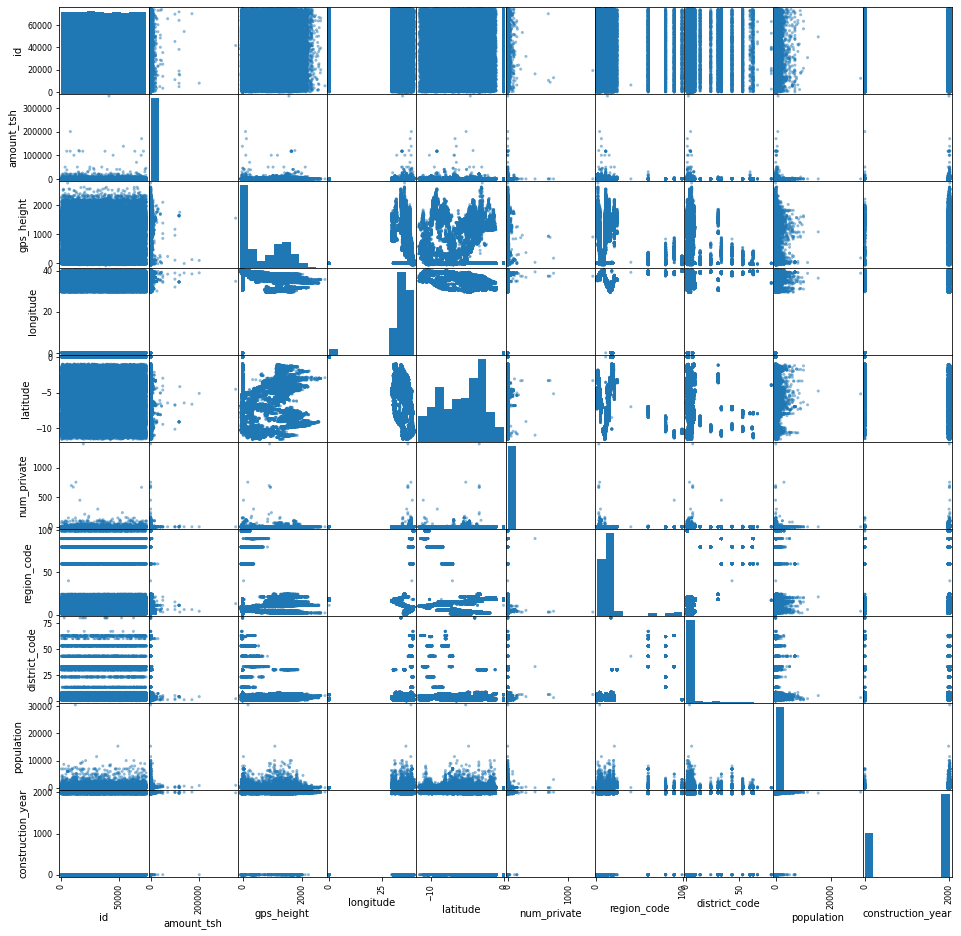

In [8]:
pd.plotting.scatter_matrix(df, figsize=(16,16))
plt.show()

- Ausreißer! Prüfung ob Fehler oder drin lassen. Bsp. construction_year 0 = fehlt??, Longitude, ...
- district_code, region_code und id lieber als string?

In [16]:
cat_features = list(filter(None, [col if df[col].dtype == object else None for col in df.columns]))
len(cat_features)

31

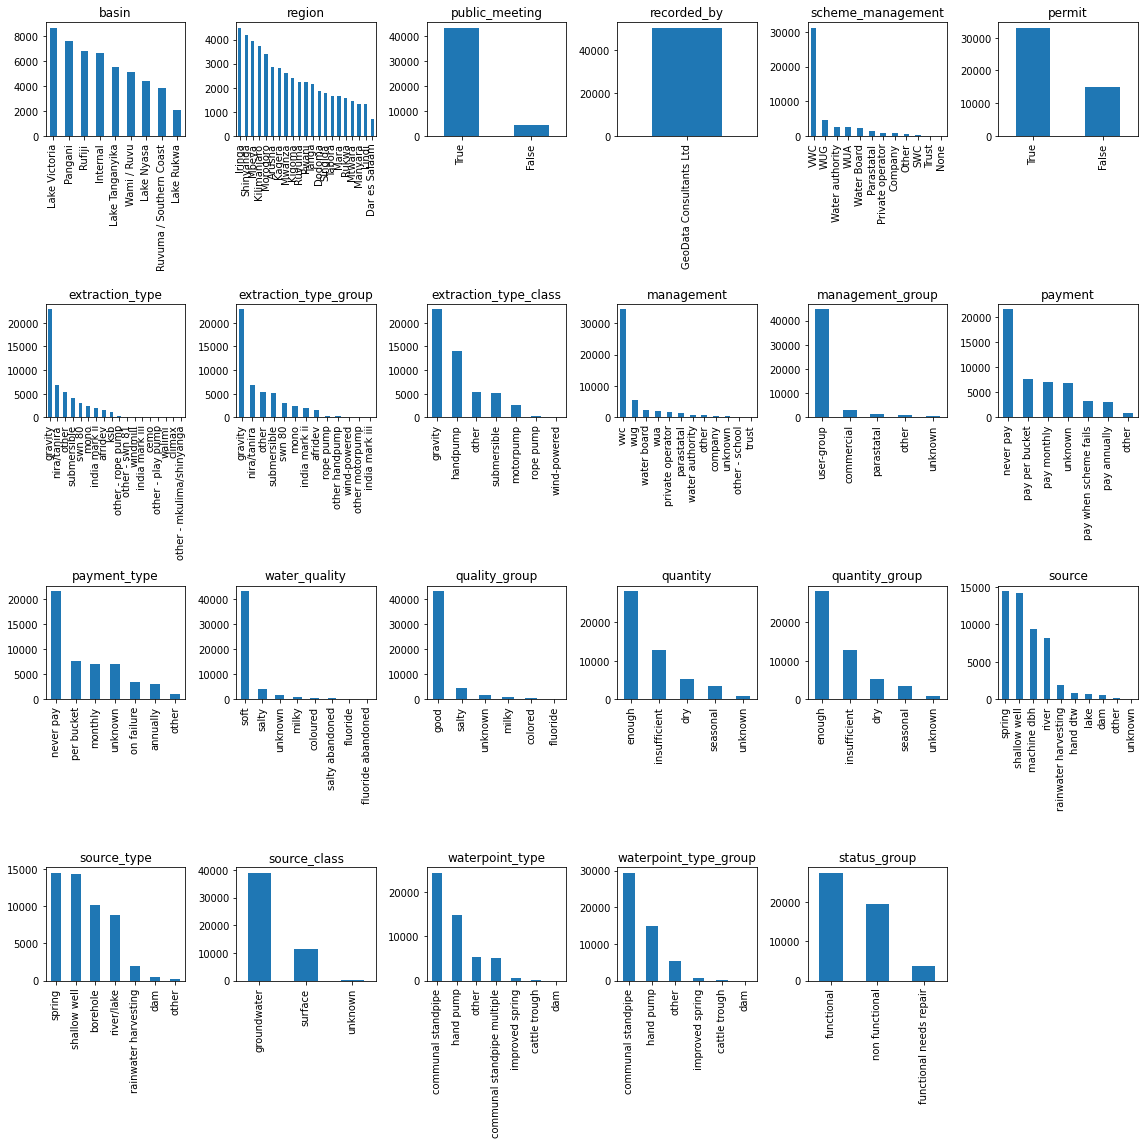

In [17]:
i=0
plt.figure(figsize=(16,16))
for col in cat_features:
    if df[col].nunique() < 25:
        i+=1
        plt.subplot(4, 6, i)
        df[col].value_counts().plot(kind = 'bar')
        plt.title(col)
plt.tight_layout()

- häufig Werte "unknown" oder "None" --> könnten evtl. entfernt werden (oder gefüllt) da genügend Datenpunkte vorhanden
- einige Merkmale mit einem sehr häufigen Wert --> Transformation auf binäre Variable (häufigster Wert true/false)
- Imbalance in der Zielvariablen
- einige sind Datentyp bool und sollten entsprechend transformiert werden

In [18]:
df["public_meeting"] = df["public_meeting"].astype(bool)
df["permit"] = df["permit"].astype(bool)

In [19]:
df["t_functional"] = df["status_group"].apply(lambda x: 0 if x=="non functional" else 1)
df["t_needs_rep"] = df["status_group"].apply(lambda x: 1 if x=="functional needs repair" else 0)

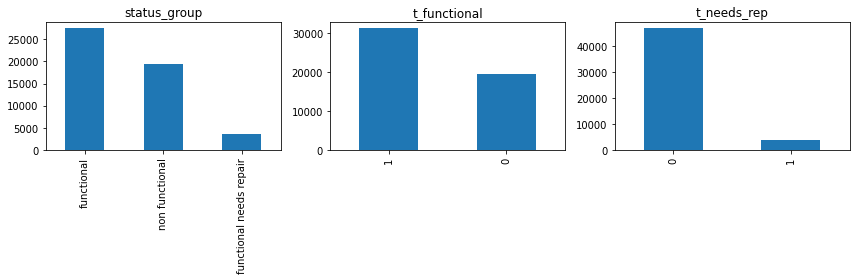

In [20]:
targets = ["status_group", "t_functional", "t_needs_rep"]
plt.figure(figsize=(12,4))
i=0
for t in targets:
        i+=1
        plt.subplot(1, 3, i)
        df[t].value_counts().plot(kind = 'bar')
        plt.title(t)
plt.tight_layout()
    

- imbalance especially for case 1 and 3
- treatment: undersampling or class weights

## Correlation Analysis

<AxesSubplot:>

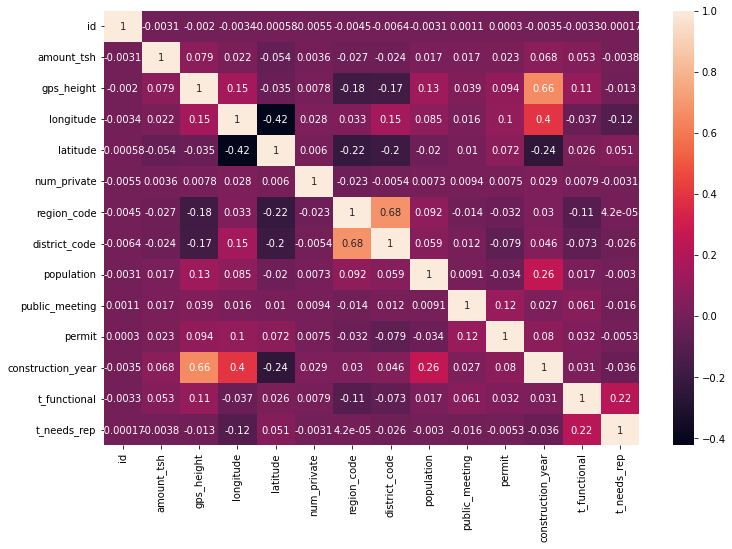

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [22]:
cols = list(df.columns); cols.remove("status_group"); cols.remove("t_functional"); cols.remove("t_needs_rep")
cat_features = list(filter(None, [col if df[col].dtype == object else None for col in cols]))
num_features = list(filter(None, [col if df[col].dtype == "int64" or df[col].dtype == "float64" else None for col in cols]))
bin_features = list(filter(None, [col if df[col].dtype == bool else None for col in cols]))

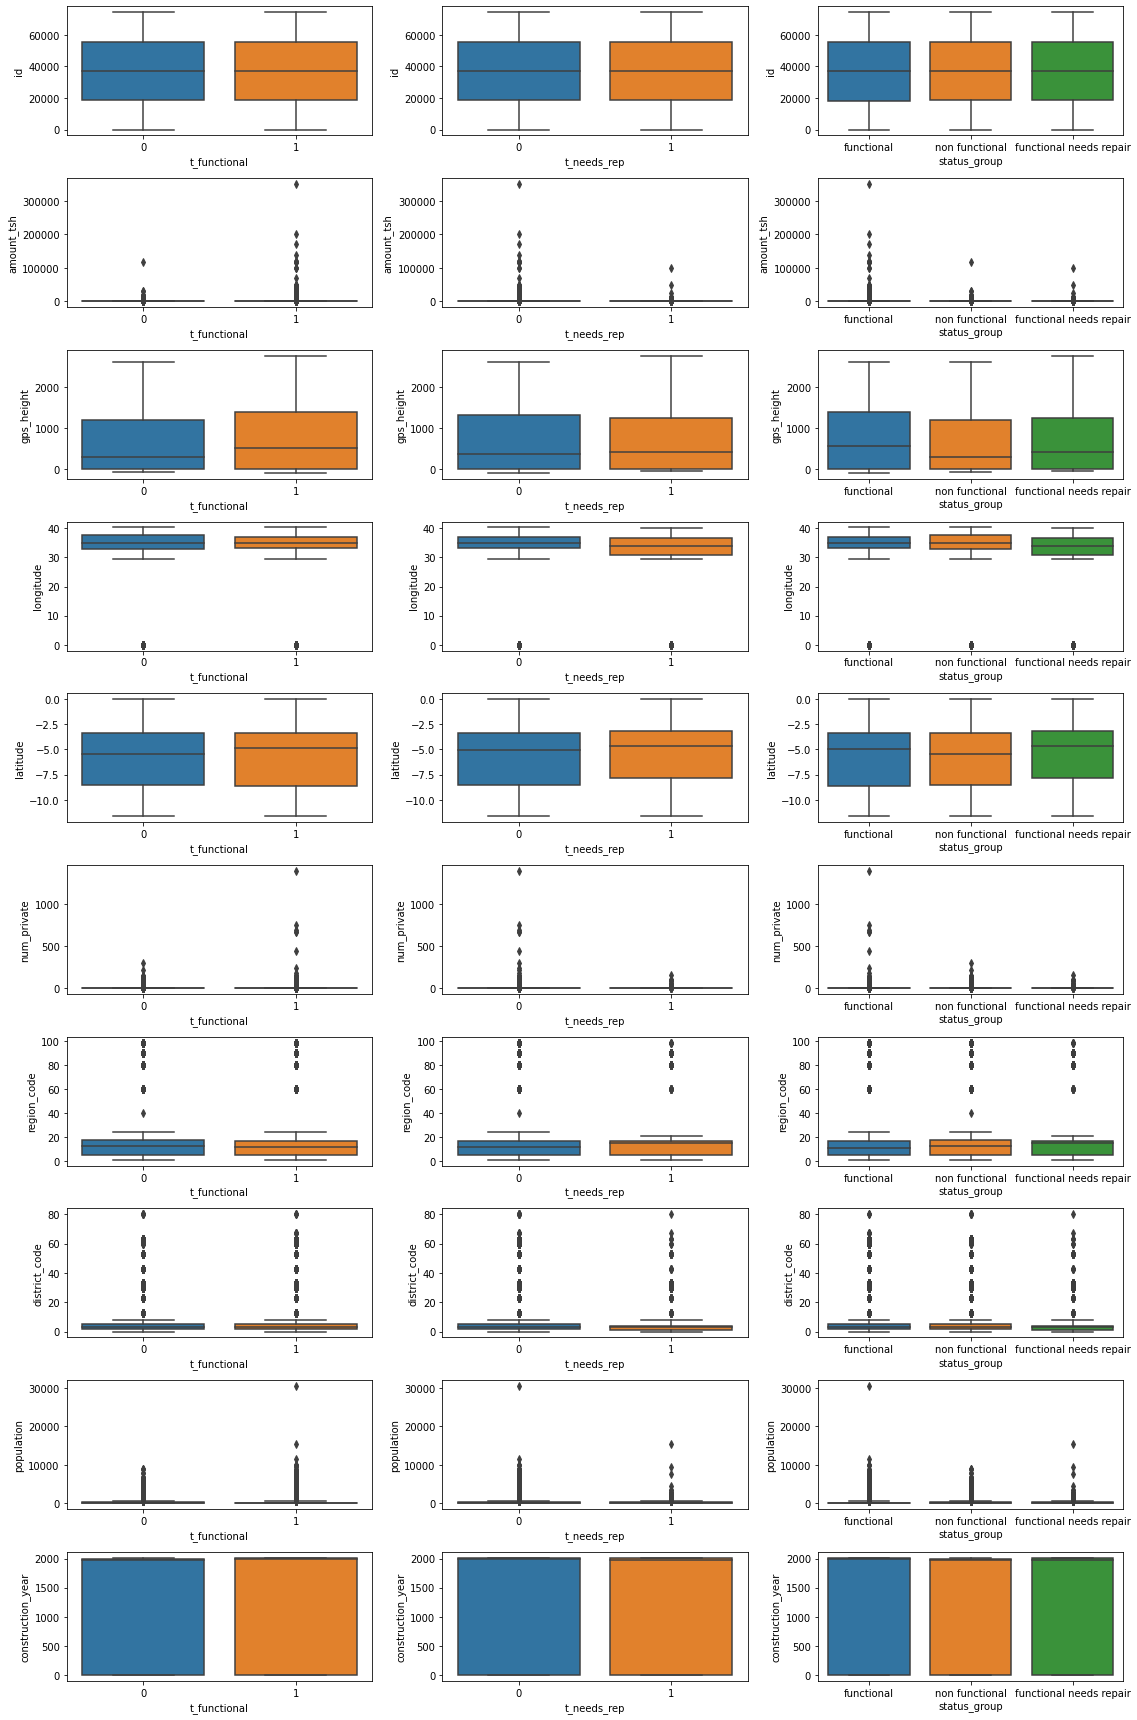

In [23]:
i=1
plt.figure(figsize=(16,24))
for f in num_features:
    plt.subplot(len(num_features), 3, i)
    sns.boxplot(x="t_functional", y=f, data=df)
    plt.subplot(len(num_features), 3, i+1)
    sns.boxplot(x="t_needs_rep", y=f, data=df)
    plt.subplot(len(num_features), 3, i+2)
    sns.boxplot(x="status_group", y=f, data=df)
    i+=3
plt.tight_layout()

- PBC und Eta2?

In [24]:
df.construction_year.value_counts()

0       17575
2010     2243
2008     2211
2009     2167
2000     1759
2007     1323
2006     1260
2003     1092
2011     1065
2004      952
2012      934
2002      924
1978      901
2005      873
1995      861
1999      828
1990      819
1998      814
1985      811
1996      687
1984      673
1980      664
1982      656
1994      619
1972      616
1974      572
1997      548
1992      545
1993      520
2001      460
1988      431
1983      406
1975      385
1986      365
1970      355
1976      353
1991      284
1989      269
1987      257
1981      200
1977      168
1979      162
1973      156
2013      145
1971      126
1960       87
1963       75
1967       73
1968       64
1969       46
1964       34
1962       28
1961       18
1966       16
1965       15
Name: construction_year, dtype: int64

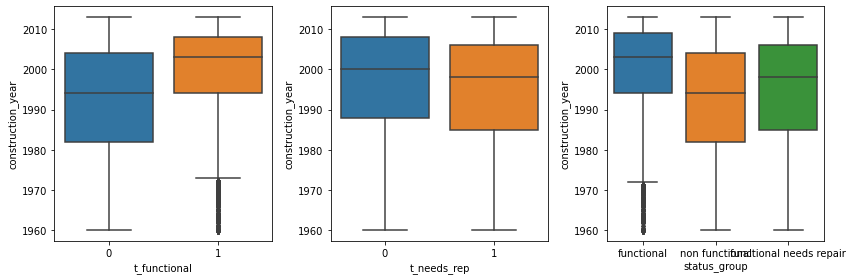

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.boxplot(x="t_functional", y="construction_year", data=df.loc[df["construction_year"]!=0])
plt.subplot(1, 3, 2)
sns.boxplot(x="t_needs_rep", y="construction_year", data=df.loc[df["construction_year"]!=0])
plt.subplot(1, 3, 3)
sns.boxplot(x="status_group", y="construction_year", data=df.loc[df["construction_year"]!=0])
plt.tight_layout()

0        1118
1         NaN
2         NaN
3        7753
4        5160
         ... 
50485    4095
50486     NaN
50487    9919
50488    2619
50489     NaN
Length: 50490, dtype: object

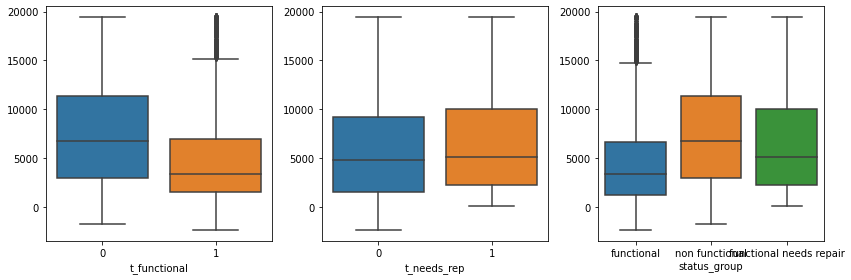

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.boxplot(x=df.loc[df["construction_year"]!=0]["t_functional"], y=age.loc[df["construction_year"]!=0].apply(lambda x: x.days))
plt.subplot(1, 3, 2)
sns.boxplot(x=df.loc[df["construction_year"]!=0]["t_needs_rep"], y=age.loc[df["construction_year"]!=0].apply(lambda x: x.days))
plt.subplot(1, 3, 3)
sns.boxplot(x=df.loc[df["construction_year"]!=0]["status_group"], y=age.loc[df["construction_year"]!=0].apply(lambda x: x.days))
plt.tight_layout()

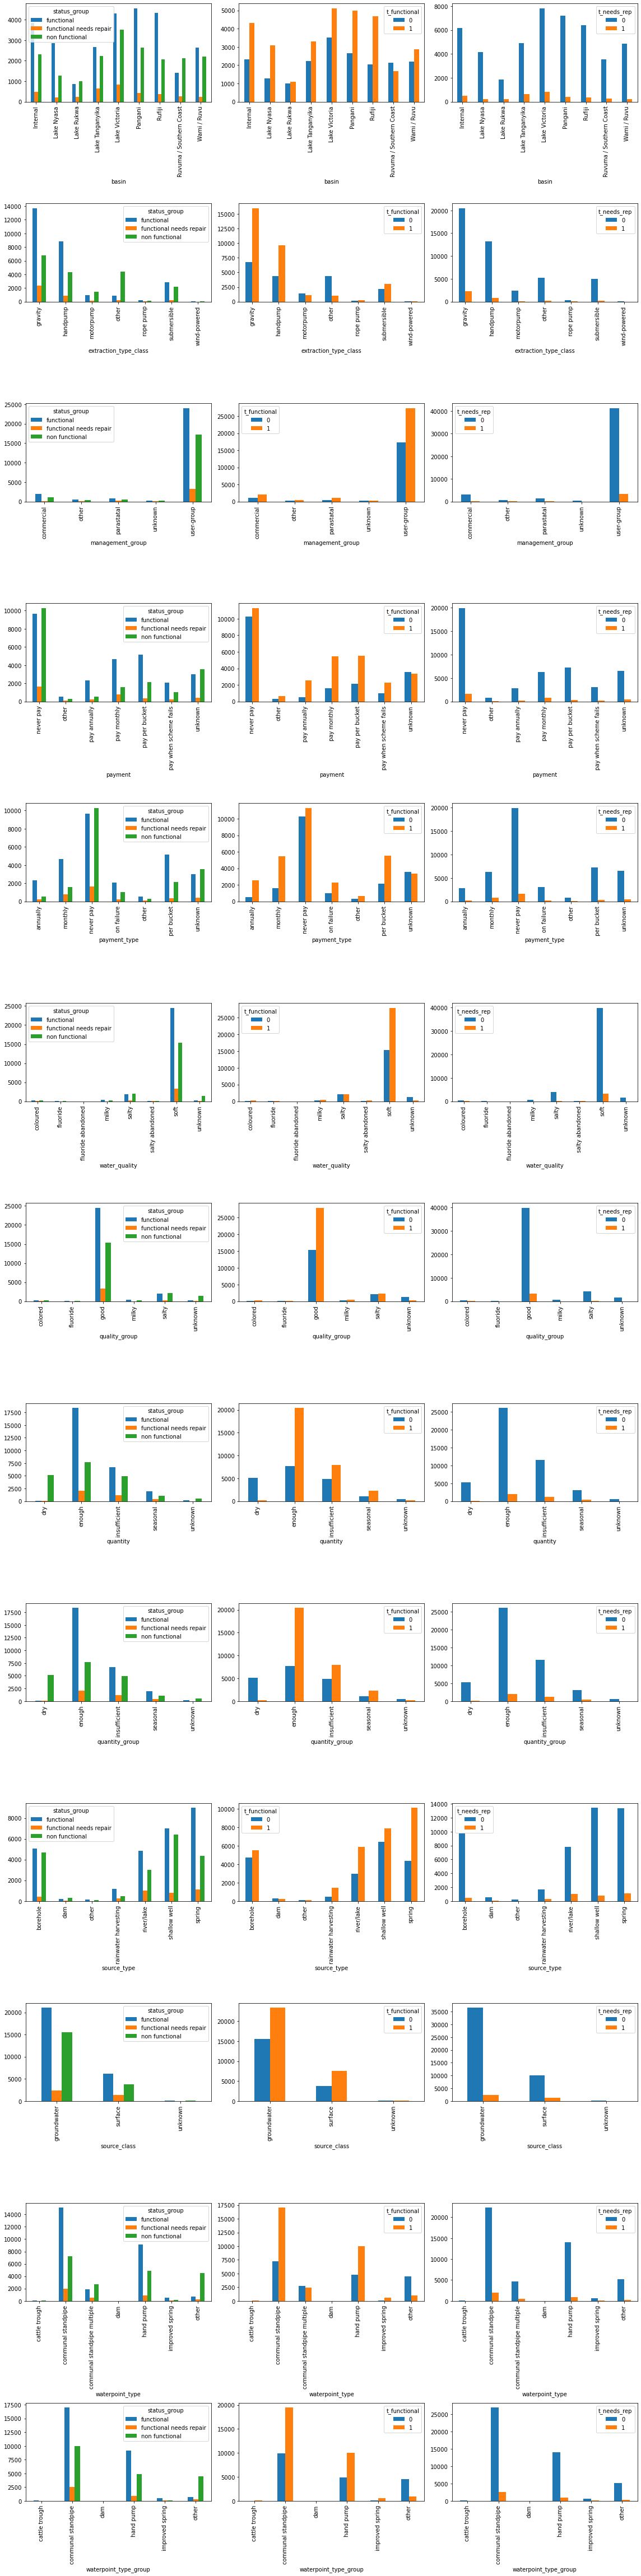

In [19]:
i=1
fig = plt.figure(figsize=(16,64))
for col in cat_features:
    if df[col].nunique() < 10 and df[col].nunique()>1:
        for target in targets:
            ax = fig.add_subplot(13, 3, i)
            ct = pd.crosstab(index=df[col],columns=df[target])
            ct.plot.bar(ax=ax, rot=0)
            plt.xticks(rotation=90)
            i+=1
plt.tight_layout()

Achtung! Doppelte auch noch für Spalten mit nunique>=10 prüfen!

In [20]:
test = df["payment"] + " -- " + df["payment_type"]
test.value_counts()

never pay -- never pay                 21577
pay per bucket -- per bucket            7628
pay monthly -- monthly                  7039
unknown -- unknown                      6931
pay when scheme fails -- on failure     3311
pay annually -- annually                3092
other -- other                           912
dtype: int64

In [21]:
test = df["quality_group"] + " -- " + df["water_quality"]
test.value_counts()

good -- soft                      43191
salty -- salty                     4124
unknown -- unknown                 1608
milky -- milky                      674
colored -- coloured                 425
salty -- salty abandoned            282
fluoride -- fluoride                173
fluoride -- fluoride abandoned       13
dtype: int64

In [22]:
test = df["quantity"] + " -- " + df["quantity_group"]
test.value_counts()

enough -- enough                28197
insufficient -- insufficient    12861
dry -- dry                       5290
seasonal -- seasonal             3473
unknown -- unknown                669
dtype: int64

In [23]:
test = df["waterpoint_type"] + " -- " + df["waterpoint_type_group"]
test.value_counts()

communal standpipe -- communal standpipe             24288
hand pump -- hand pump                               14852
other -- other                                        5438
communal standpipe multiple -- communal standpipe     5148
improved spring -- improved spring                     665
cattle trough -- cattle trough                          93
dam -- dam                                               6
dtype: int64

- payment und payment_type sind das gleiche
- quality_group und water_quality sind fast das gleiche: Abwägung Detailgrad
- quantity und quantity_group sind das gleiche
- waterpoint_type und waterpoint_type_group sind fast das gleiche: Abwägung Detailgrad: mehr Detail hat Mehrwert!!!
- --> jeweils nur 1 benutzen
- other ist häufig wichtig zur Unterscheidung!

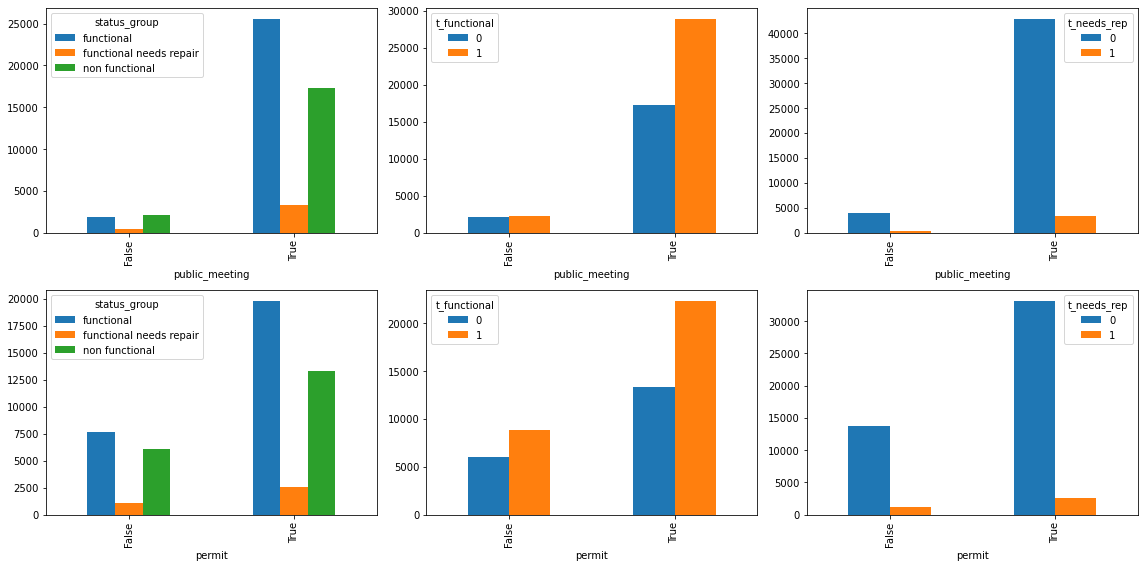

In [24]:
i=1
fig = plt.figure(figsize=(16,8))
for col in bin_features:
    for target in targets:
        ax = fig.add_subplot(len(bin_features), 3, i)
        ct = pd.crosstab(index=df[col],columns=df[target])
        ct.plot.bar(ax=ax, rot=0)
        plt.xticks(rotation=90)
        i+=1
plt.tight_layout()

Fazit für Feature Selection: nur Spalten rausnehmen, die offensichtlich keinen Mehrwert bringen (nur 1 Wert, ID, doppelt, ...) und permit z.B. drin lassen, auch wenn keinen (univariat) erkennbaren Einfluss, da eh genügend Daten

In [25]:
# import plotly.express as px
# fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="status_group", zoom=5, opacity=0.25, hover_name="id")
# fig.update_layout(
#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {
#             "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#             ]
#         }
#       ])
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [26]:
# interesting = ["gps_height", "basin", "region", "construction_year"]
# fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="permit", zoom=5, opacity=0.25, hover_name="id")
# fig.update_layout(
#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {
#             "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#             ]
#         }
#       ])
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

Konstruktion neuer Features

In [27]:
df["amount_per_capita"] = df["amount_tsh"] / df["population"]

In [28]:
df["Month_rec"] = pd.DatetimeIndex(df['date_recorded']).month
df["Year_rec"] = pd.DatetimeIndex(df['date_recorded']).year

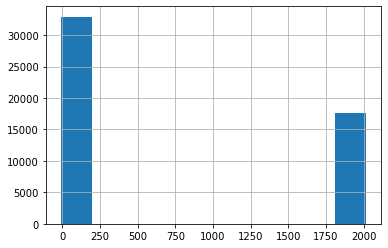

In [29]:
df["Age_of_pump"] = df["Year_rec"] - df["construction_year"]
df["Age_of_pump"].hist() # problem: 0 Werte in construction_year

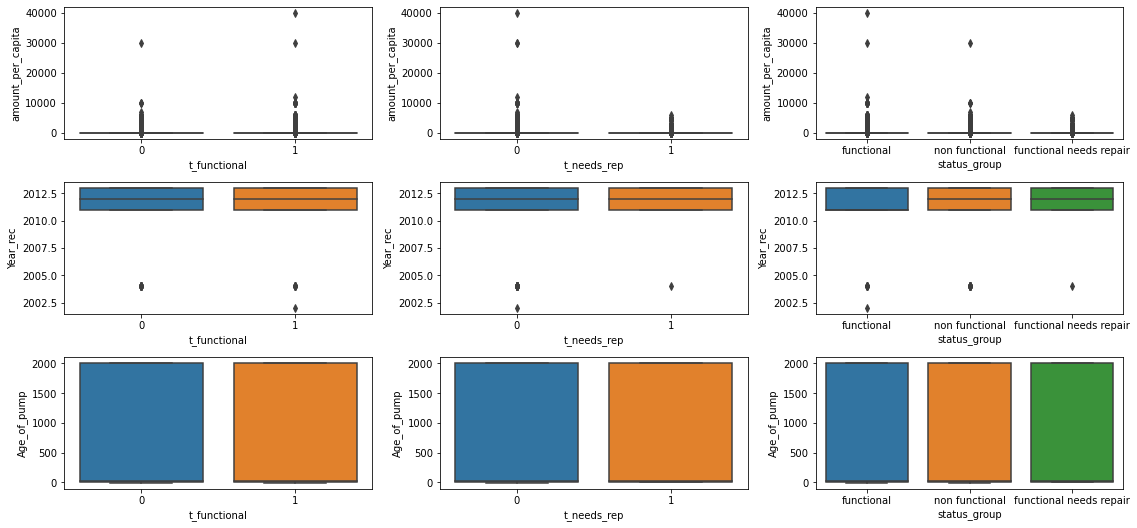

In [30]:
i=1
plt.figure(figsize=(16,24))
for f in ["amount_per_capita", "Year_rec", "Age_of_pump"]:
    plt.subplot(len(num_features), 3, i)
    sns.boxplot(x="t_functional", y=f, data=df)
    plt.subplot(len(num_features), 3, i+1)
    sns.boxplot(x="t_needs_rep", y=f, data=df)
    plt.subplot(len(num_features), 3, i+2)
    sns.boxplot(x="status_group", y=f, data=df)
    i+=3
plt.tight_layout()

In [31]:
df[["amount_per_capita", "Year_rec", "Age_of_pump", "t_functional", "t_needs_rep", "status_group"]].corr()

,amount_per_capita,Year_rec,Age_of_pump,t_functional,t_needs_rep
amount_per_capita,1.000000,-0.057731,-0.005640,0.030938,-0.005326
Year_rec,-0.057731,1.000000,-0.354685,-0.008439,0.045340
Age_of_pump,-0.005640,-0.354685,1.000000,-0.031245,0.036178
t_functional,0.030938,-0.008439,-0.031245,1.000000,0.221175
t_needs_rep,-0.005326,0.045340,0.036178,0.221175,1.000000


In [32]:
df["Month_rec"] = df["Month_rec"].astype(int)

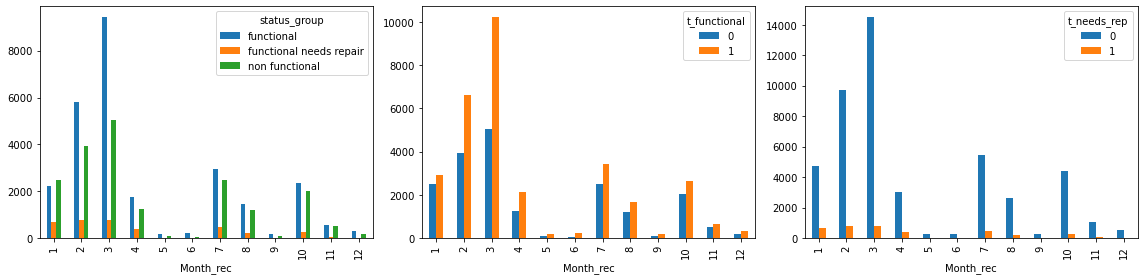

In [33]:
fig = plt.figure(figsize=(16,4))
i=1
for target in targets:
    ax = fig.add_subplot(1, 3, i)
    ct = pd.crosstab(index=df["Month_rec"],columns=df[target])
    ct.sort_values("Month_rec").plot.bar(ax=ax, rot=0)
    plt.xticks(rotation=90)
    i+=1
plt.tight_layout()

In [34]:
df["Month_rec"] = df["Month_rec"].astype(str) # welcher type? int vs. string?

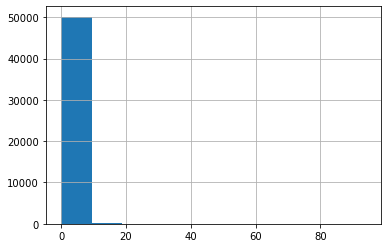

In [35]:
df["num_private"].loc[df["num_private"]<100].hist()

In [36]:
df["num_private"].value_counts(normalize=True)

0      0.987106
6      0.001386
1      0.001129
8      0.000891
5      0.000772
         ...   
23     0.000020
55     0.000020
87     0.000020
698    0.000020
94     0.000020
Name: num_private, Length: 62, dtype: float64

# Data Preparation
0-2 + 17-26: Timo

In [37]:
df_prepared = pd.DataFrame({})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50490 entries, 0 to 50489
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50490 non-null  int64  
 1   amount_tsh             50490 non-null  float64
 2   date_recorded          50490 non-null  object 
 3   funder                 47396 non-null  object 
 4   gps_height             50490 non-null  int64  
 5   installer              47380 non-null  object 
 6   longitude              50490 non-null  float64
 7   latitude               50490 non-null  float64
 8   wpt_name               50490 non-null  object 
 9   num_private            50490 non-null  int64  
 10  basin                  50490 non-null  object 
 11  subvillage             50175 non-null  object 
 12  region                 50490 non-null  object 
 13  region_code            50490 non-null  int64  
 14  district_code          50490 non-null  int64  
 15  lg

##### ID
--> no value for predictions --> drop

##### amount_tsh

In [39]:
df.amount_tsh.value_counts()

0.0         35430
500.0        2628
50.0         2122
1000.0       1263
20.0         1228
            ...  
170000.0        1
38000.0         1
8500.0          1
6300.0          1
220.0           1
Name: amount_tsh, Length: 94, dtype: int64

In [40]:
test = df["amount_tsh"].apply(lambda x: x==0)

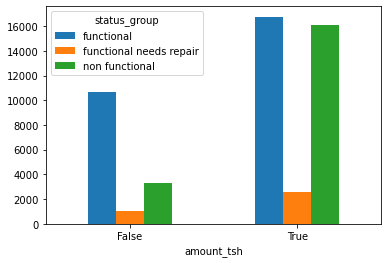

In [41]:
ct = pd.crosstab(index=test,columns=df["status_group"])
ct.plot.bar(rot=0)

--> many 0 values, which seem to affect the targets --> keep

In [42]:
df_prepared["amount_tsh"] = df["amount_tsh"]

##### date_recorded

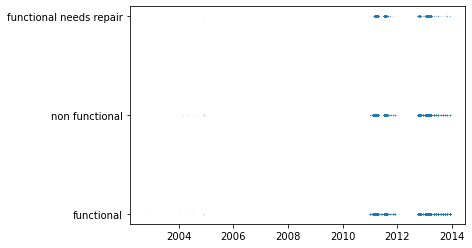

In [43]:
import datetime
df["date_recorded"] = df["date_recorded"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d"))
plt.scatter(df["date_recorded"], df["status_group"], alpha=0.1, s=0.1)

--> to many distinct values --> drop

##### Month_rec

--> newly created but no visible influence --> drop

##### Year_rec

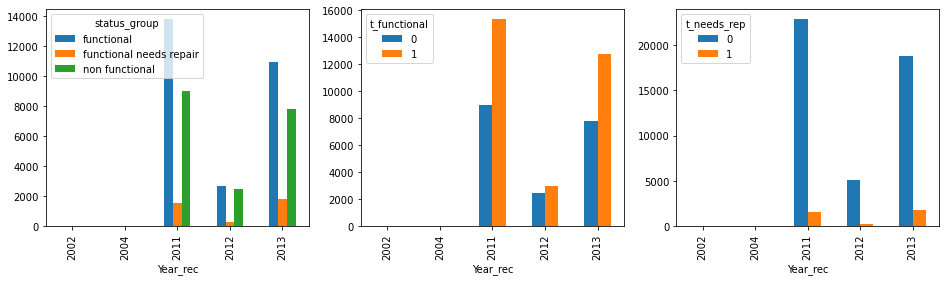

In [44]:
i=1
fig = plt.figure(figsize=(16,4))
for target in targets:
    ax = fig.add_subplot(1, 3, i)
    ct = pd.crosstab(index=df["Year_rec"], columns=df[target])
    ct.sort_values("Year_rec").plot.bar(ax=ax, rot=0)
    plt.xticks(rotation=90)
    i+=1

In [45]:
df.Year_rec.value_counts()

2011    24372
2013    20625
2012     5467
2004       25
2002        1
Name: Year_rec, dtype: int64

--> include year

In [46]:
df_prepared["record_year"] = df["Year_rec"]

##### population

--> many 0 values --> mistake or correct?

--> include population

In [47]:
df_prepared["population"] = df["population"]

###### amount per capita

In [48]:
df_prepared["amount_per_capita"] = df_prepared.apply(lambda x: x["amount_tsh"]/x["population"] if x["population"] != 0 else 0, axis=1)

##### public_meeting

In [49]:
df_prepared["public_meeting"] = df["public_meeting"]

##### recorded_by

In [50]:
df["recorded_by"].value_counts()

GeoData Consultants Ltd    50490
Name: recorded_by, dtype: int64

--> drop

##### scheme_management

In [53]:
df["scheme_management"] = df["scheme_management"].apply(lambda x: "Other" if str(x)==str(np.nan) or x=="None" else x)
df["scheme_management"].value_counts()

VWC                 31266
WUG                  4429
Other                3918
Water authority      2671
WUA                  2469
Water Board          2344
Parastatal           1430
Private operator      913
Company               906
SWC                    78
Trust                  66
Name: scheme_management, dtype: int64

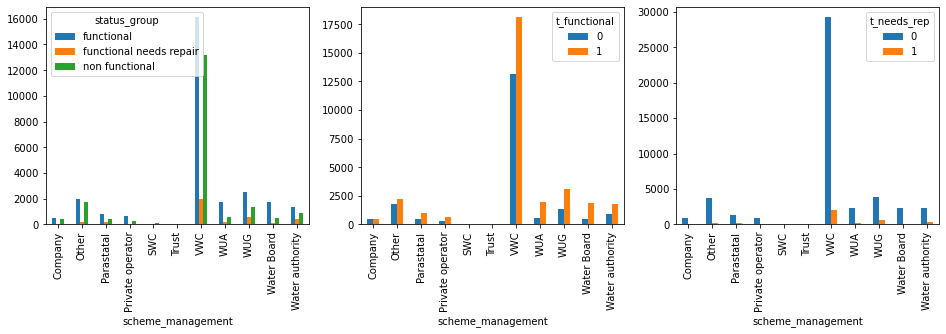

In [54]:
i=1
fig = plt.figure(figsize=(16,4))
for target in targets:
    ax = fig.add_subplot(1, 3, i)
    ct = pd.crosstab(index=df["scheme_management"], columns=df[target])
    ct.plot.bar(ax=ax, rot=0)
    plt.xticks(rotation=90)
    i+=1

In [56]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
oh.fit(df["scheme_management"].to_numpy().reshape(-1, 1))
res = oh.transform(df["scheme_management"].to_numpy().reshape(-1, 1)).toarray()
sm = pd.DataFrame(res, columns=[x for x in oh.categories_[0]])
df_prepared = pd.concat((df_prepared, sm),axis=1)

##### scheme_name

--> drop (more values than scheme_management, same information)

##### permit

In [57]:
df_prepared["permit"] = df["permit"]

##### construction_year

In [58]:
df["construction_year"].value_counts()

0       17575
2010     2243
2008     2211
2009     2167
2000     1759
2007     1323
2006     1260
2003     1092
2011     1065
2004      952
2012      934
2002      924
1978      901
2005      873
1995      861
1999      828
1990      819
1998      814
1985      811
1996      687
1984      673
1980      664
1982      656
1994      619
1972      616
1974      572
1997      548
1992      545
1993      520
2001      460
1988      431
1983      406
1975      385
1986      365
1970      355
1976      353
1991      284
1989      269
1987      257
1981      200
1977      168
1979      162
1973      156
2013      145
1971      126
1960       87
1963       75
1967       73
1968       64
1969       46
1964       34
1962       28
1961       18
1966       16
1965       15
Name: construction_year, dtype: int64

In [59]:
df["has_construction_year"] = df["construction_year"].apply(lambda x: x!=0)

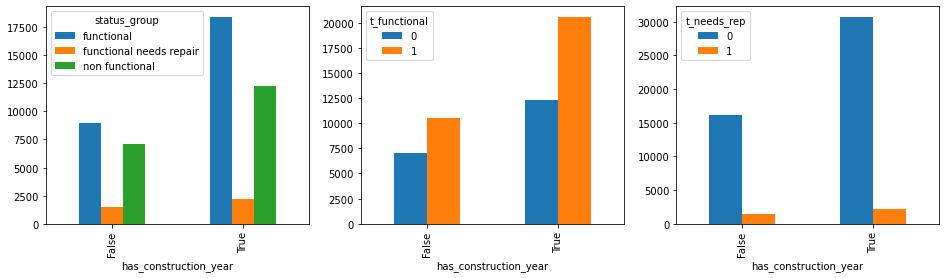

In [60]:
i=1
fig = plt.figure(figsize=(16,4))
for target in targets:
    ax = fig.add_subplot(1, 3, i)
    ct = pd.crosstab(index=df["has_construction_year"], columns=df[target])
    ct.plot.bar(ax=ax, rot=0)
    plt.xticks(rotation=90)
    i+=1

In [61]:
df.loc[df["construction_year"]!=0].corr()["construction_year"]

id                      -0.004842
amount_tsh               0.005124
gps_height              -0.008812
longitude                0.029549
latitude                 0.038449
num_private             -0.006547
region_code             -0.007779
district_code            0.009978
population               0.036888
public_meeting           0.038544
permit                  -0.052041
construction_year        1.000000
t_functional             0.272608
t_needs_rep             -0.032749
amount_per_capita       -0.015772
Year_rec                 0.019486
Age_of_pump             -0.996917
has_construction_year         NaN
Name: construction_year, dtype: float64

--> vorerst ignorieren

##### extraction_type / extraction_type_group / extraction_type_class

In [62]:
extraction = ["extraction_type", "extraction_type_group", "extraction_type_class"]
df[extraction].nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class     7
dtype: int64

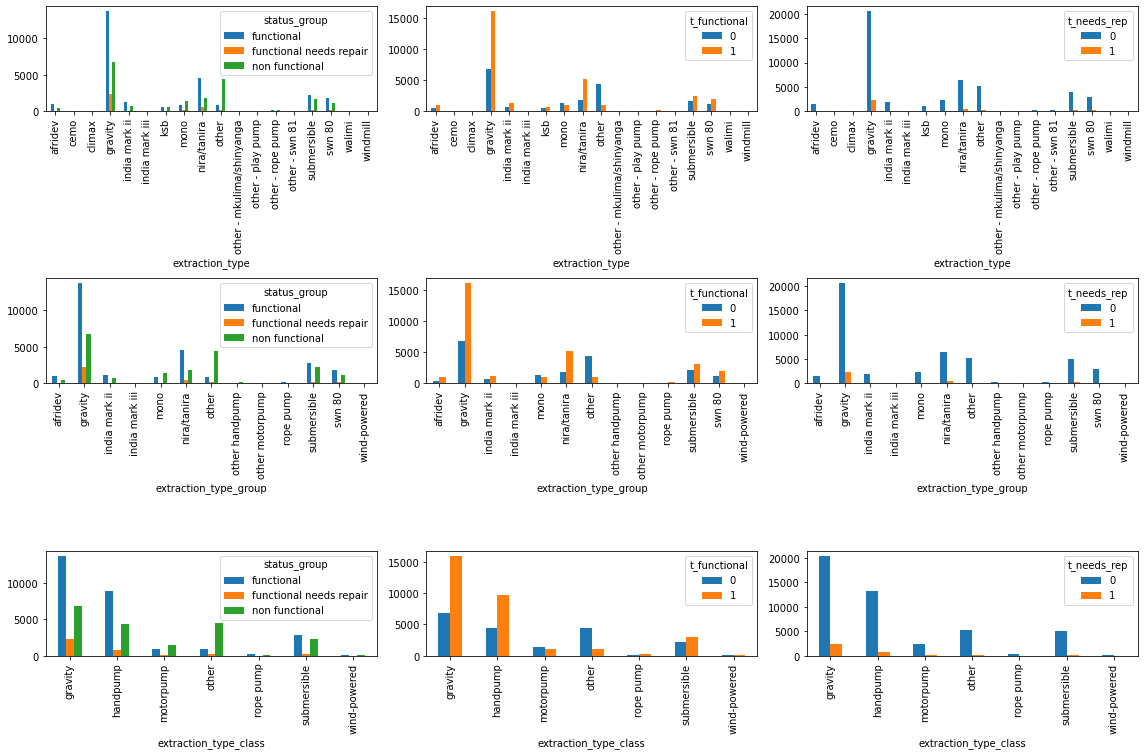

In [63]:
i=1
fig = plt.figure(figsize=(16,32))
for col in extraction:
    for target in targets:
        ax = fig.add_subplot(9, 3, i)
        ct = pd.crosstab(index=df[col],columns=df[target])
        ct.plot.bar(ax=ax, rot=0)
        plt.xticks(rotation=90)
        i+=1
plt.tight_layout()

--> more categories do not bring significantly more value
--> use variable with least categories (extraction_type_class)

In [64]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
oh.fit(df["extraction_type_class"].to_numpy().reshape(-1, 1))
res = oh.transform(df["extraction_type_class"].to_numpy().reshape(-1, 1)).toarray()
et = pd.DataFrame(res, columns=[x for x in oh.categories_[0]])
df_prepared = pd.concat((df_prepared, et), axis=1)

In [65]:
df_prepared

,amount_tsh,record_year,population,amount_per_capita,public_meeting,Company,Other,Parastatal,Private operator,SWC,...,Water Board,Water authority,permit,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
0,30.0,2013,123,0.243902,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2013,0,0.000000,True,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,2011,0,0.000000,True,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,200.0,2011,0,0.000000,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2011,500,0.000000,True,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50485,6000.0,2011,0,0.000000,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50486,0.0,2011,0,0.000000,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50487,1000.0,2013,350,2.857143,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50488,0.0,2013,230,0.000000,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Preparation Pipeline

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("pump_train.csv")
df = df[list(df.columns[0:3]) + list(df.columns[17:27])]
df["amount_per_capita"] = df.apply(lambda x: x["amount_tsh"]/x["population"] if x["population"] != 0 else 0, axis=1)

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value="other"):
        self.fill_value = fill_value
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.array([self.fill_value if str(x)==str(np.nan) else x for x in X]).reshape(-1,1)

In [68]:
from sklearn.pipeline import Pipeline

scheme_pipeline = Pipeline([
('imputer', MyImputer(fill_value="other")),
('one_hot', OneHotEncoder())
])

In [69]:
class YearAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        date_column = pd.Series(X)
        return np.array(pd.DatetimeIndex(date_column).year).reshape(-1,1)
        

In [70]:
from sklearn.preprocessing import OrdinalEncoder

year_pipeline = Pipeline([
    ("add_year", YearAdder()),
    ("ord_enc", OrdinalEncoder()),
    ("scale", MinMaxScaler())
])

In [71]:
class AmountPerCapitaAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        date_column = pd.Series(X)
        return np.array(pd.DatetimeIndex(date_column).year).reshape(-1,1)

In [72]:
columns_to_drop = ["id", "date_recorded", "recorded_by", "scheme_name", "construction_year", "extraction_type", "extraction_type_group"]
pipeline = ColumnTransformer([
    ("drop", "drop", columns_to_drop),
    ("num", MinMaxScaler(), ["amount_tsh", "population", "amount_per_capita"]),
    ("one_hot", OneHotEncoder(), ["extraction_type_class"]),
    ("scheme", scheme_pipeline, "scheme_management"),
    ("year",  year_pipeline, "date_recorded")
])

In [73]:
result = pipeline.fit_transform(df).toarray()
np.savetxt("res.csv", result, delimiter=",")

In [74]:
result[:,1]

array([0.00403279, 0.        , 0.        , ..., 0.01147541, 0.00754098,
       0.        ])